# Intermediate Importing Data in Python
* Link: https://learn.datacamp.com/courses/intermediate-importing-data-in-python

## Course Description

As a data scientist, you will need to clean data, wrangle and munge it, visualize it, build predictive models and interpret these models. Before you can do so, however, you will need to know how to get data into Python. In the prequel to this course, you learned many ways to import data into Python: from flat files such as .txt and .csv; from files native to other software such as Excel spreadsheets, Stata, SAS, and MATLAB files; and from relational databases such as SQLite and PostgreSQL. In this course, you'll extend this knowledge base by learning to import data from the web and by pulling data from Application Programming Interfaces— APIs—such as the Twitter streaming API, which allows us to stream real-time tweets.

## Summary - You'll learn how to

* Import and locally save datasets from the web
* Load datasets into pandas DataFrames
* Make HTTP requests (GET requests)
* Scrape web data such as HTML
* Parse HTML into useful data (BeautifulSoup)
* Use the ```urllib``` and requests packages

In [13]:
filepath = '/content/drive/My Drive/Colab Notebooks/Career Track - Data Scientist with Python/15 - Course - Intermediate Importing Data in Python/datasets/'

# Chapter 1 - Importing data from the Internet

The web is a rich source of data from which you can extract various types of insights and findings. In this chapter, you will learn how to get data from the web, whether it is stored in files or in HTML. You'll also learn the basics of scraping and parsing web data.

## Importing at files from the web

### How to import data from the web?

* Easy approach: go to URL and click to download files
  * Problems: manual, slow, not reproducible, not scalable
    * Not scalable: For 100 files, you would need to repeat the downloading process 100 times
    * Not reproducible: Other people would need to go out of Python to get the data

### The urllib package
* Provides interface for fetching data across the web
* ```urlopen()``` - accepts URLs instead of file names

In [2]:
from urllib.request import urlretrieve

# Specify the dataset URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

# Write the contents of the url to a file
urlretrieve(url, 'winequality-white.csv')

('winequality-white.csv', <http.client.HTTPMessage at 0x7f36246da5c0>)

### Getting dataset from the web

In [3]:
from urllib.request import urlretrieve
import pandas as pd

# Assign url of file
url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Save file locally
urlretrieve(url, 'winequality-red.csv')

# Read file into a DataFrame
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


### Using pd.read_csv() to import directly from the web to the DataFrame

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


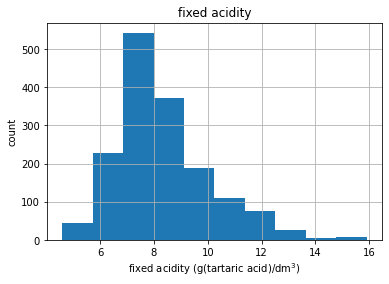

In [4]:
# Using pd.read_csv() to import directly from the web to the DataFrame
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://s3.amazonaws.com/assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'

# Read file into a DataFrame: df
df = pd.read_csv(url, sep=';')

print(df.head())

# Plot first column of df
pd.DataFrame.hist(df.loc[:, ['fixed acidity']])
#pd.DataFrame.hist(df.iloc[:, 0:1])
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()


### Using pd.read_excel() with URL

In [5]:
# Using pd.read_excel()
import pandas as pd
url = 'http://s3.amazonaws.com/assets.datacamp.com/course/importing_data_into_r/latitude.xls'

df = pd.read_excel(url, sheet_name=None)
print(df.keys()) # Print the sheetnames to the shell
print(df['1700'].head()) # Print the head of the first sheet

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


## HTTP requests to import files from the web

### URL
* Uniform/Universal Resource Locator
* References to web resources
* Focus: web addresses
* Ingredients:
  * Protocol identier - http:
  * Resource name - datacamp.com
* These specify web addresses uniquely

### HTTP

* HyperText Transfer Protocol
* Foundation of data communication for the web
* HTTPS - more secure form of HTTP
* Going to a website = sending HTTP request
  * GET request
* ```urlretrieve()``` performs a GET request and save data locally
* HTML - HyperText Markup Language

### GET requests using urllib

* Extract wikipedia home page HTML

In [6]:
# Extract wikipedia home page HTML
from urllib.request import urlopen, Request
url = "https://www.wikipedia.org/"
request = Request(url)
response = urlopen(request) # Returns as HTTPResponse object

html = response.read() # Returns HTML as a string
print(html)

response.close()

b'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-46c49284.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-46c49284.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_siste

### Requests package
* Used to make GET requests in the web
* One of the most downloaded Python packages of all time
  * Pulling in 7.000.000 downloads every month

In [7]:
# Using package requests
import requests
url = "https://www.wikipedia.org/"

# Package request, send the request and catch the response in a single function
r = requests.get(url)

# Stores the response as a string
text = r.text

print(text[0:300])

<!DOCTYPE html>
<html lang="mul" class="no-js">
<head>
<meta charset="utf-8">
<title>Wikipedia</title>
<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">
<script>
document.documentElem


## Scraping the web in Python

### HTML
* Mix of unstructured and structured data
* Structured data:
  * Has pre-dened data model, or
  * Organized in a dened manner
* Unstructured data: neither ofthese properties
* HTML has tags that determine where, for example, **headings** can be found, and **hyperlinks**

### BeautifulSoup
* Parse and extract structured data from HTML
* Make tag soup beautiful and extract information

* Why 'soup'?
  * 'tag soup' refers to structurally or syntactically incorrect HTML code written for a web page.
  * BeautifulSoup makes 'tag soup' beautiful again and extracts information from it with ease.

#### Using BeautifulSoup

In [8]:
# Using BeautifulSoup
from bs4 import BeautifulSoup
import requests
url = 'https://www.crummy.com/software/BeautifulSoup/'

r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)

# Makes HTML prittier again. Show HTML indented.
print(soup.prettify()[0:500]) 

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and X


#### Exploring BeautifulSoup

In [9]:
print(soup.title)

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>


In [10]:
print(soup.get_text()[3:50])

Beautiful Soup: We called him Tortoise because 


#### Find all hyperlinks



In [11]:
# Find all hyperlinks
for link in soup.find_all('a'):
    print(link.get('href'))

#Download
bs4/doc/
#HallOfFame
enterprise.html
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
bs4/download/
http://lxml.de/
http://code.google.com/p/html5lib/
bs4/doc/
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
https://tidelift.com/security
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
zine/
None
bs4/download/
http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html
download/3.x/BeautifulSoup-3.2.2.tar.gz
https://tidelift.com/subscription/pkg/pypi-beautifulsoup?utm_source=pypi-beautifulsoup&utm_medium=referral&utm_campaign=website
None
http://www.nytimes.co

# Chapter 2 - Interacting with APIs to import data from the web

In this chapter, you will gain a deeper understanding of how to import data from the web. You will learn the basics of extracting data from APIs, gain insight on the importance of APIs, and practice extracting data by diving into the OMDB and Library of Congress APIs.

## Introduction to APIs and JSONs



### APIs
* Application Programming Interface
* Protocols and routines
  * Building and interacting with software applications
* Examples: OMDb API The Open Movie Database, Twitter API


### JSONs

* JavaScript Object Notation
* Real-time server-to-browser communication
* Specified and popularized by Douglas Crockford
* Human readable
* Key-value structure
  * Keys are always strings
  * Values can be strings, integers, arrays or objects

### Loading JSONs in Python

In [17]:
# Loading JSONs in Python
import json
filename = 'movie.json'
with open(filepath + filename, 'r') as json_file:
    json_data = json.load(json_file)

print(type(json_data))

<class 'dict'>


### Exploring JSONs in Python

In [18]:
# Iteration through the key-value pairs
for key, value in json_data.items():
    print(key + ':', value)
#for key in json_data.keys():
#    print(key + ':', json_data[key])

Title: The Social Network
Year: 2010
Rated: PG-13
Released: 01 Oct 2010
Runtime: 120 min
Genre: Biography, Drama
Director: David Fincher
Writer: Aaron Sorkin (screenplay), Ben Mezrich (book)
Actors: Jesse Eisenberg, Rooney Mara, Bryan Barter, Dustin Fitzsimons
Plot: As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.
Language: English, French
Country: USA
Awards: Won 3 Oscars. Another 171 wins & 183 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.7/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore: 95
imdbRating: 7.7
imdbVotes: 599,526
imdbID: tt1285016
Type: movie
DVD: 11 Jan 2011
BoxOffice: 

## APIs and interacting with the world wide web
* Much of the data that you'll get from APIs are packaged as JSONs

### What is an API?

* API is an acronym and is short for Application Program interface.
* It is a set of protocols and routines for building and interacting with software applications.
* An API is a bunch of code that allows two software programs to communicate with each other.
* Big tech companies all have APIs: Twitter, Uber, Facebook, Instagram.
* Example: Twitter API, Wikipedia API.
  * Twitter APIs are used by social scientists engaged in research concerning social networks.

### Connecting to an API in Python

In [19]:
# Pulling movie data from the Open Movie Database, or OMDB, API.
import requests

url = 'http://www.omdbapi.com/?apikey=72bc447a&t=harry'
print(url)

# Package and send the request to the URL, which describes your API query, and catch
# the response in one line of code
r = requests.get(url) 

# The Response Object 'r' has a built-in JSON decoder that returns a dictionary
json_data = r.json() 

for key, value in json_data.items():
    print(key + ':', value)

http://www.omdbapi.com/?apikey=72bc447a&t=harry
Title: Harry Potter and the Deathly Hallows: Part 2
Year: 2011
Rated: PG-13
Released: 15 Jul 2011
Runtime: 130 min
Genre: Adventure, Drama, Fantasy, Mystery
Director: David Yates
Writer: Steve Kloves (screenplay), J.K. Rowling (novel)
Actors: Ralph Fiennes, Michael Gambon, Alan Rickman, Daniel Radcliffe
Plot: Harry, Ron, and Hermione search for Voldemort's remaining Horcruxes in their effort to destroy the Dark Lord as the final battle rages on at Hogwarts.
Language: English
Country: UK, USA
Awards: Nominated for 3 Oscars. Another 46 wins & 91 nominations.
Poster: https://m.media-amazon.com/images/M/MV5BMjIyZGU4YzUtNDkzYi00ZDRhLTljYzctYTMxMDQ4M2E0Y2YxXkEyXkFqcGdeQXVyNTIzOTk5ODM@._V1_SX300.jpg
Ratings: [{'Source': 'Internet Movie Database', 'Value': '8.1/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '85/100'}]
Metascore: 85
imdbRating: 8.1
imdbVotes: 743,526
imdbID: tt1201607
Type: movie
DVD: 11 Nov

### What was that URL?
* ```http``` : making an HTTP request
* ```www.omdbapi.com``` : querying the OMDBAPI
* ```?t=hackers``` : the question mark refers to a query string
  * What follows the questions mark in the query string is the query we are making to the OMBD API
  * Querying ```t=hackers``` asked the API to return the data about the movie with the title (t) 'Hackers'
* ```apikey=72bc447a``` : Has to be added to the query string, otherwise you won't be able to pull data
  * A particular ```apikey``` can be created in the API's website
* See ```http://www.omdbapi.com/``` in 'Usage' to see how to make queries for the API

### Get all movie IDs and data from website and create database

In [20]:
# Get all movie IDs and data and create database
# Example: Harry Potter and the Deathly Hallows Part 2 has imdbID 'tt1201607'
# Id format is 'tt' + 7 numbers

import requests
import pandas as pd

url = 'http://www.omdbapi.com/?apikey=72bc447a&'

df = pd.DataFrame()

for i in range(1,9999999): 
    id = 'i=tt' + str(i).zfill(7)
    r = requests.get(url + id)     
    json_data = r.json() 
    
    if next(iter(json_data)) == 'Response':
        print('Error, no data found: ', id)
        continue

    df2 = pd.DataFrame(json_data)    
    df = df.append(df2, ignore_index=True)
    print(id, df.shape[0])
    if df.shape[0] == 1000:
        print('Database has a 1000 entries.')
        break

df.to_csv('movieIDsBD.csv', index=False)

i=tt0000001 1
i=tt0000002 2
i=tt0000003 3
i=tt0000004 4
i=tt0000005 5
i=tt0000006 6
i=tt0000007 7
i=tt0000008 8
i=tt0000009 9
i=tt0000010 10
i=tt0000011 11
i=tt0000012 12
i=tt0000013 13
i=tt0000014 14
i=tt0000015 15
i=tt0000016 16
i=tt0000017 17
i=tt0000018 18


KeyboardInterrupt: ignored

### Checking out the Wikipedia API

In [21]:
# Checking out the Wikipedia API
# The query will return nested JSONs, that is, JSONs with JSONs, but Python can 
# handle that because it will translate them into dictionaries within dictionaries.
import requests

url = 'https://en.wikipedia.org/w/api.php?action=query& \
    prop=extracts&format=json&exintro=&titles=pizza'

# Package the request, send the request and catch the response
r = requests.get(url)

# Decode the JSON data into a dictionary
json_data = r.json()

# Print the Wikipedia page extract
pizza_extract = json_data['query']['pages']['24768']['extract']
print(pizza_extract)

<p class="mw-empty-elt">
</p>

<p><b>Pizza</b> (<small>Italian: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsa]</span>, <small>Neapolitan: </small><span title="Representation in the International Phonetic Alphabet (IPA)">[ˈpittsə]</span>) is a savory dish of Italian origin consisting of a usually round, flattened base of leavened wheat-based dough topped with tomatoes, cheese, and often various other ingredients (such as anchovies, mushrooms, onions, olives, pineapple, meat, etc.) which is then baked at a high temperature, traditionally in a wood-fired oven. A small pizza is sometimes called a pizzetta. A person who makes pizza is known as a <b>pizzaiolo</b>.
</p><p>In Italy, pizza served in formal settings, such as at a restaurant, is presented unsliced, and is eaten with the use of a knife and fork. In casual settings, however, it is cut into wedges to be eaten while held in the hand.
</p><p>The term <i>pizza</i> was first recorded in the 1

# Chapter 3 - Diving deep into the Twitter API

In this chapter, you will consolidate your knowledge of interacting with APIs in a deep dive into the Twitter streaming API. You'll learn how to stream real-time Twitter data, and how to analyze and visualize it.

## The Twitter API and Authentication

### Access the Twitter API
* To access Twitter API you'll need a twitter account.
  * Access cannot be anonymous.
* Then, you have to log into Twitter Apps and click "Create a New App"
  * You need to agree to a variety of terms and conditions.
* Go to "Keys and Access Tokens" tab and copy your API key, your API secret, your Access Token and your Access Token secret.
  * These are the Authentication credentials that will allow you to access the Twitter API from Python

### Twitter has a number of APIs
* REST APIs
  * REST is short for Representational State Transfer
  * Twitter's REST API allows the user to read and write Twitter data
* Streaming APIs
  * To stream Twitter data
* GET statuses/sample API
  * Returns a small random sample of all public statuses

### Tweets are returned as JSONs
* The returns contain numerous possible fields, as text, user, language, time, tweet

### Using Tweepy: Authentication handler
* Python package
* Has an OAuth handler

In [22]:
# Authentication handler - tw_auth.py
import tweepy, json

access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

### Tweepy: define stream listener class

In [23]:
# Tweepy: define stream listener class - st_class.py
# Listener creates a file called 'tweets.txt', which collects streaming tweets
# and writes then to the file 'tweets.txt'
class MyStreamListener(tweepy.StreamListener):
    
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")
    
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\\n')
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

### Using Tweepy: stream tweets!!

In [24]:
# Using Tweepy: stream tweets!! - tweets.py

# Create Streaming object and authenticate
l = MyStreamListener()
stream = tweepy.Stream(auth, l)

# This line filters Twitter Streams to capture data by keywords:
stream.filter(track=['apples','oranges'])

### Twitter API exercise

#### Reading Twitter data from file

In [25]:
import json

filename = 'tweets3.txt'
tweets_data = []

tweets_file = open(filepath + filename, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

tweets_file.close()
print(tweets_data[0].keys())


dict_keys(['in_reply_to_user_id', 'created_at', 'filter_level', 'truncated', 'possibly_sensitive', 'timestamp_ms', 'user', 'text', 'extended_entities', 'in_reply_to_status_id', 'entities', 'favorited', 'retweeted', 'is_quote_status', 'id', 'favorite_count', 'retweeted_status', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'id_str', 'in_reply_to_screen_name', 'coordinates', 'lang', 'place', 'contributors', 'geo', 'retweet_count', 'source'])


#### Creates DataFrame

In [26]:
import pandas as pd

df = pd.DataFrame(tweets_data, columns=['text', 'lang'])
print(df.head(5))

                                                text lang
0  RT @bpolitics: .@krollbondrating's Christopher...   en
1  RT @HeidiAlpine: @dmartosko Cruz video found.....   en
2  Njihuni me Zonjën Trump !!! | Ekskluzive https...   et
3  Your an idiot she shouldn't have tried to grab...   en
4  RT @AlanLohner: The anti-American D.C. elites ...   en


#### Tell whether the first argument (a word) occurs within the 2nd argument (a tweet).

In [27]:
import re

# Tell whether the first argument (a word) occurs within 
# the 2nd argument (a tweet).
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)

    if match:
        return True
    return False

#### Counting number of tweets containing the words 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


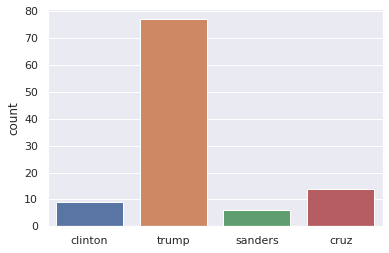

In [28]:
# Counting number of tweets containing the words 
# 'clinton', 'trump', 'sanders' and 'cruz'
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# Labels
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot the bar chart
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()

## What you’ve learned
* Importing text les and at les
* Importing les in other formats
* Writing SQL queries
* Getting data from relational databases
* Pulling data from the web
* Pulling data from APIs